In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as s
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
data = pd.read_excel('storedata_total.xlsx')
data.head()

,custid,retained,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city
0,6H6T6N,0,2012-09-28,2013-08-11 00:00:00,2013-08-11 00:00:00,29,100.000000,3.448276,14.52,0.000000,0,0,0,Monday,DEL
1,APCENR,1,2010-12-19,2011-04-01 00:00:00,2014-01-19 00:00:00,95,92.631579,10.526316,83.69,0.181641,1,1,1,Friday,DEL
2,7UP6MS,0,2010-10-03,2010-12-01 00:00:00,2011-07-06 00:00:00,0,0.000000,0.000000,33.58,0.059908,0,0,0,Wednesday,DEL
3,7ZEW8G,0,2010-10-22,2011-03-28 00:00:00,2011-03-28 00:00:00,0,0.000000,0.000000,54.96,0.000000,0,0,0,Thursday,BOM
4,8V726M,1,2010-11-27,2010-11-29 00:00:00,2013-01-28 00:00:00,30,90.000000,13.333333,111.91,0.008850,0,0,0,Monday,BOM


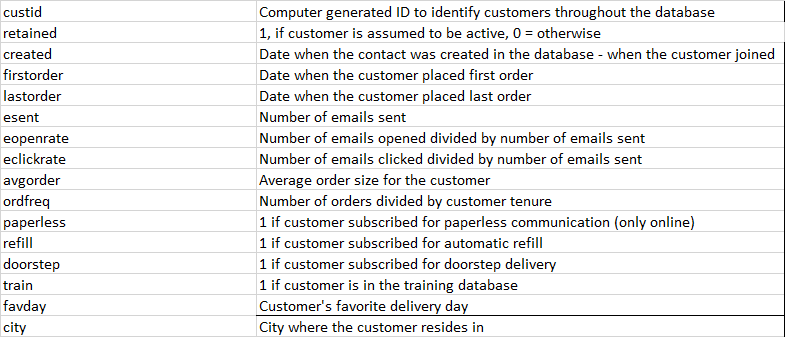

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30801 entries, 0 to 30800
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   custid      30781 non-null  object        
 1   retained    30801 non-null  int64         
 2   created     30781 non-null  datetime64[ns]
 3   firstorder  30781 non-null  object        
 4   lastorder   30781 non-null  object        
 5   esent       30801 non-null  int64         
 6   eopenrate   30801 non-null  float64       
 7   eclickrate  30801 non-null  float64       
 8   avgorder    30801 non-null  float64       
 9   ordfreq     30801 non-null  float64       
 10  paperless   30801 non-null  int64         
 11  refill      30801 non-null  int64         
 12  doorstep    30801 non-null  int64         
 13  favday      30801 non-null  object        
 14  city        30801 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(5), object(5)
memory usage: 3.

In [4]:
data.describe()

,retained,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep
count,30801.000000,30801.000000,30801.000000,30801.000000,30801.000000,30801.000000,30801.000000,30801.000000,30801.000000
mean,0.794520,28.138405,25.554838,5.671139,61.873944,0.037729,0.649037,0.095094,0.038895
std,0.404059,16.751380,29.557106,10.561704,41.007588,0.103932,0.477279,0.293350,0.193347
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,16.000000,2.040816,0.000000,40.020000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,32.000000,13.207547,0.000000,50.970000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,42.000000,40.000000,7.142857,74.280000,0.040816,1.000000,0.000000,0.000000
max,1.000000,291.000000,100.000000,100.000000,2600.140000,3.250000,1.000000,1.000000,1.000000


In [5]:
data.isnull().sum()

custid        20
retained       0
created       20
firstorder    20
lastorder     20
esent          0
eopenrate      0
eclickrate     0
avgorder       0
ordfreq        0
paperless      0
refill         0
doorstep       0
favday         0
city           0
dtype: int64

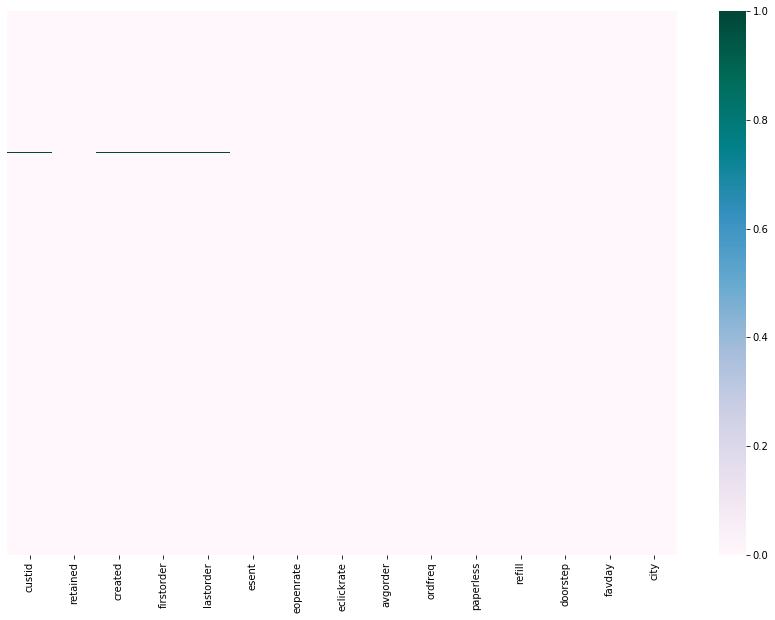

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(data.isnull(),cmap='PuBuGn',yticklabels=False);

In [7]:
data.dropna(inplace=True)## Dropping the null values

In [8]:
data.reset_index(inplace=True)

In [9]:
data.isnull().sum()

index         0
custid        0
retained      0
created       0
firstorder    0
lastorder     0
esent         0
eopenrate     0
eclickrate    0
avgorder      0
ordfreq       0
paperless     0
refill        0
doorstep      0
favday        0
city          0
dtype: int64

In [10]:
first_ord = []
for i in range(0,len(data)):
    if i in data[(data.firstorder == '1/0/00')].index:
        first_ord.append(data.created[i])
    else:
        first_ord.append(data.firstorder[i])
data['firstorder'] = first_ord

In [11]:
last_ord = []
for i in range(0,len(data)):
    if i in data[data.lastorder == '1/0/00'].index:
        last_ord.append(data.firstorder[i])
    else:
        last_ord.append(data.lastorder[i])
data['lastorder'] = last_ord

In [12]:
data.to_excel('Store_Data_after_EDA.xlsx')